# Goal: To find out the properties of a product, and store which impacts the sales of a product.

In [57]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
train_data = pd.read_csv(Path('assets', 'data', 'train_bigmart_data.csv'), header=0)
test_data = pd.read_csv(Path('assets', 'data', 'test_bigmart_data.csv'), header=0)
print(train_data.columns)
print(test_data.columns)
print(train_data.head())
print(test_data.head())

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0       

# We need to predict Item_Outlet_Sales for given test data

lets first merge the train and test data for Exploratory Data Analysis

In [59]:
train_data['source'] = 'train_data'
test_data['source'] = 'test_data'
test_data['Item_Outlet_Sales'] = 0
data = pd.concat([train_data, test_data], sort = False)
print(train_data.shape, test_data.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [60]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [61]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

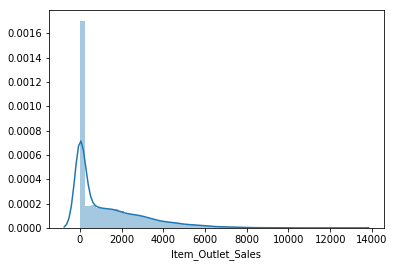

In [62]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Item_Outlet_Sales'])

* Deviates from the normal distribution.
* Has positive skewness.

# Lets look at numerical and categorial variables

In [63]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [64]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train_data
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train_data
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train_data
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train_data
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train_data


In [65]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [66]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [67]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Some observations:

* Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

* Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

* The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.

In [68]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

* This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable.

In [69]:
#frequency of categories
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDC37    10
FDM51    10
FDB35    10
FDW13    10
FDA43    10
FDO24    10
FDF58    10
FDN38    10
FDV20    10
FDV38    10
FDO11    10
FDI56    10
FDH10    10
FDS52    10
FDT59    10
FDQ47    10
FDQ49    10
FDX22    10
FDH04    10
FDB41    10
FDT03    10
FDA02    10
FDM12    10
NCV42    10
FDZ36    10
FDN32    10
DRG48    10
NCS29    10
FDY08    10
FDB14    10
         ..
FDK10     8
NCR17     8
NCC19     8
NCW17     8
FDX25     8
NCP54     8
FDV27     8
NCE18     8
NCG55     8
FDM03     8
NCL29     8
FDB10     8
FDJ34     8
NCF55     8
DRG36     8
FDB51     8
FDD21     8
FDS22     7
DRN11     7
FDH58     7
NCW54     7
FDM50     7
FDI46     7
FDL50     7
FDR51     7
FDM10     7
NCL42     7
FDM52     7
FDX49     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    201

# Analyze Outlet_Location_Type,Outlet_Size, and Outlet_Type distribution in Item_Outlet_Sale

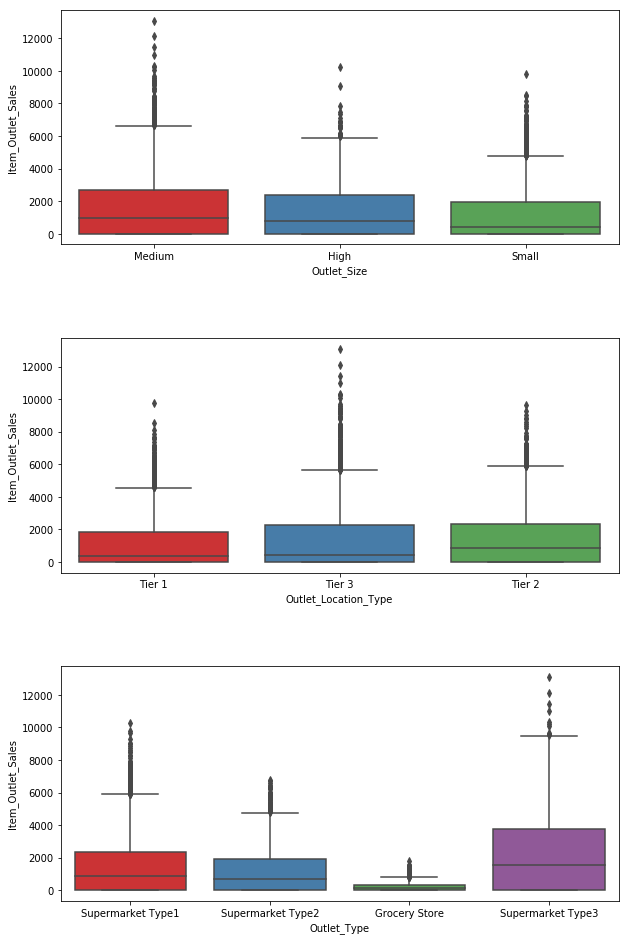

In [70]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

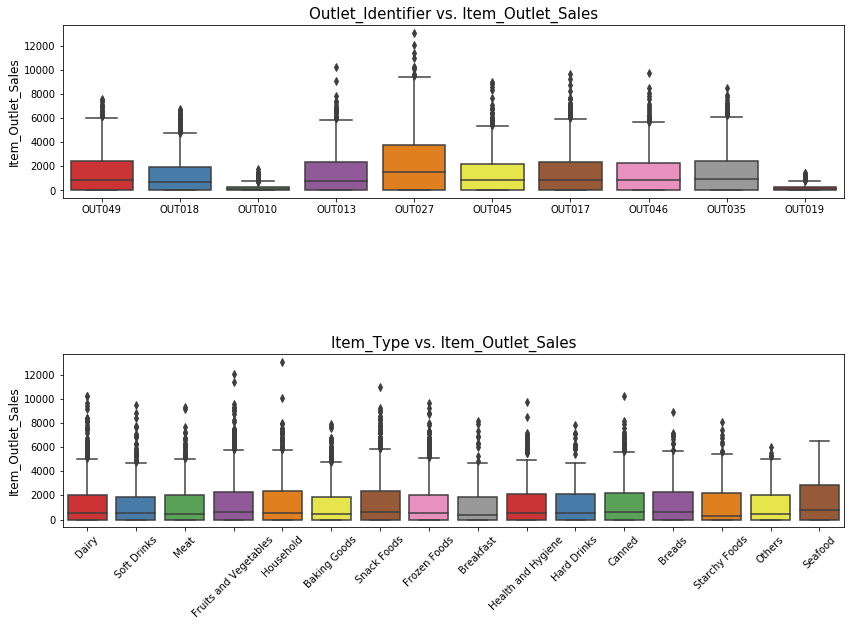

In [71]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

# Data cleaning and Filling missing values

In [72]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

* We found two variables with missing values – Item_Weight and Outlet_Size.Imputing Item_Weight by the average weight of the particular item.
* Imputing Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [73]:
#data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [74]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [75]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [76]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [77]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

* We noticed that the minimum value for Item_Visibility is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [78]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.8+ MB


# Create a broad category of Type of Item and change categories of Item fat content

* Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column
* We found typos and difference in representation in categories of Item_Fat_Content variable. (exmple Low fat is represneted as LF and Low Fat)

In [80]:
#print(data['Item_Identifier'])
#print(data['Item_Type_Combined'])
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [81]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


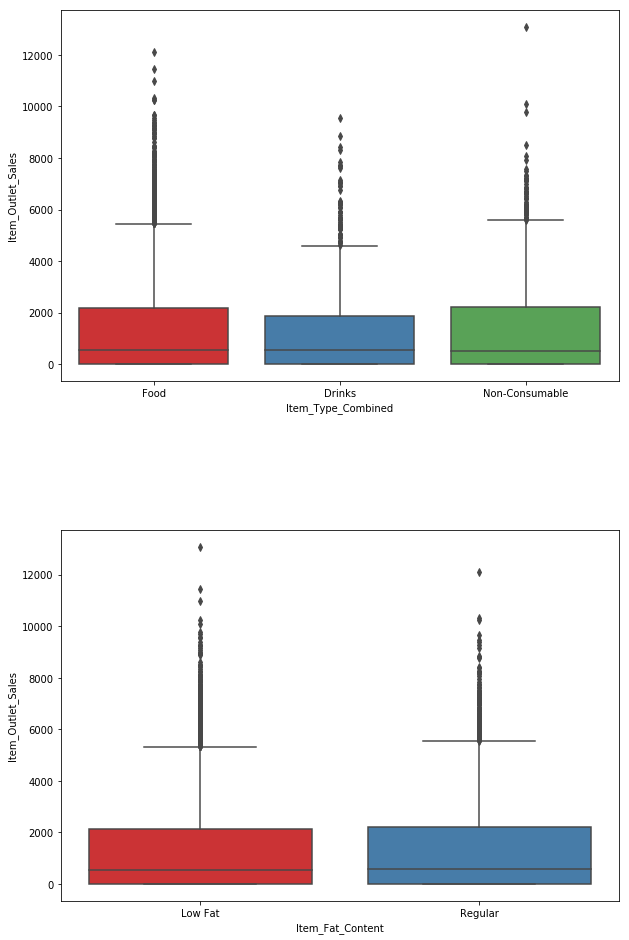

In [82]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

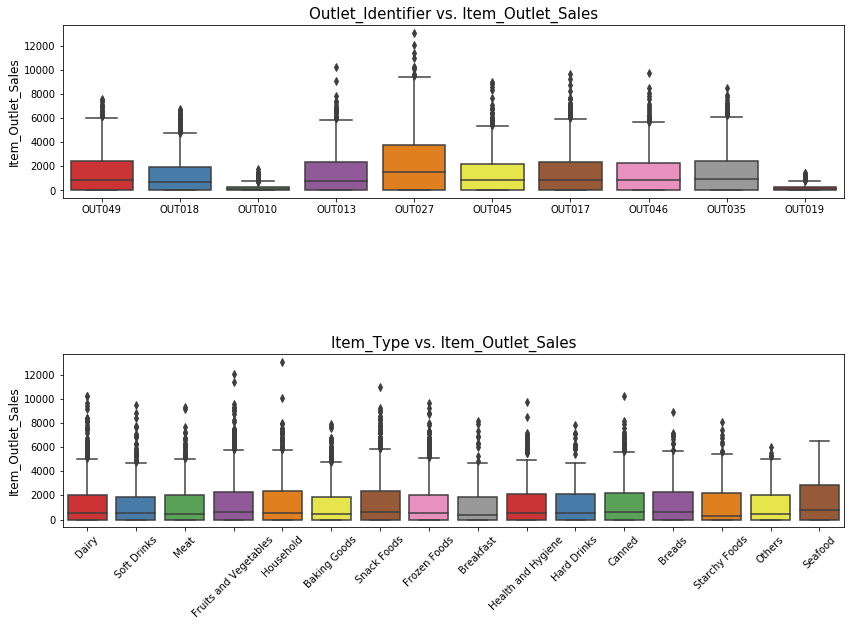

In [83]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [84]:
data.index = data['Outlet_Establishment_Year']
data.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [85]:
df = data.loc[:,['Item_Outlet_Sales']]
df.head()

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228
1999,2097.2700
1998,732.3800
1987,994.7052


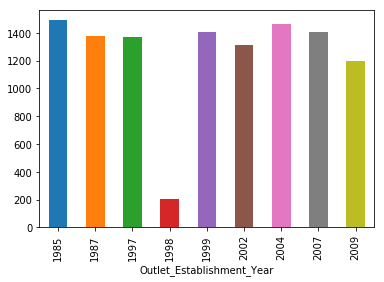

In [86]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

# Determine the  no. of years of operation of a store.
Create a new column depicting the years of operation of a store.

In [87]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
#print(data['Outlet_Years'])
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

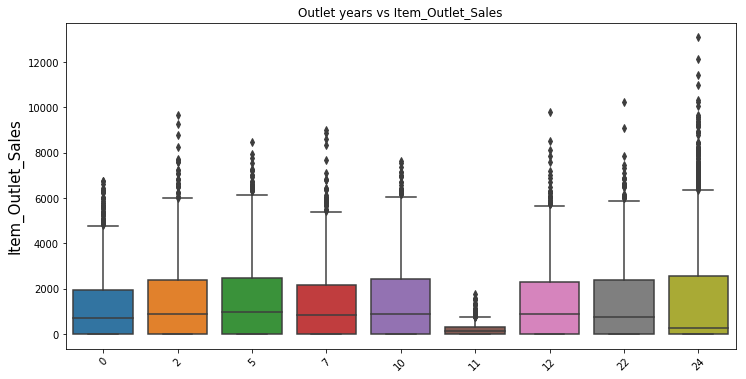

In [88]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [89]:
#convert categorical data into numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [90]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [91]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

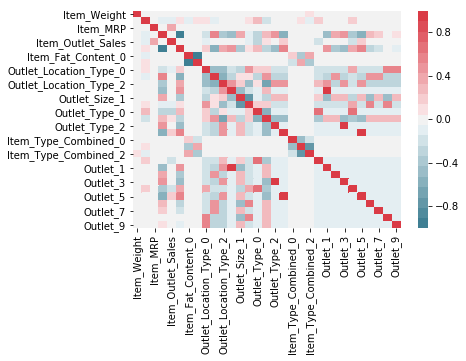

In [94]:
import seaborn as sns

sns.heatmap(data.corr(),
            vmin = -1,
            vmax = 1,
            cmap = sns.diverging_palette(220,10,n=21),
            );

In [36]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train_data"]
test = data.loc[data['source']=="test_data"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_data_modified.csv",index=False)
test.to_csv("test_data_modified.csv",index=False)

# Building Model:

In [47]:
# Reading modified data
train2 = pd.read_csv("train_data_modified.csv")
test2 = pd.read_csv("test_data_modified.csv")

In [48]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,11,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,22,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
test2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,107.8622,OUT049,10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,87.3198,OUT017,2,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,241.7538,OUT010,11,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,OUT017,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.792854,0.118599,234.2300,OUT027,24,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [51]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [52]:
#Mean based:
mean_sales = train2['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test2[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

In [53]:
X_train.dtypes

Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Years                int64
Item_Fat_Content_0          int64
Item_Fat_Content_1          int64
Outlet_Location_Type_0      int64
Outlet_Location_Type_1      int64
Outlet_Location_Type_2      int64
Outlet_Size_0               int64
Outlet_Size_1               int64
Outlet_Size_2               int64
Outlet_Type_0               int64
Outlet_Type_1               int64
Outlet_Type_2               int64
Outlet_Type_3               int64
Item_Type_Combined_0        int64
Item_Type_Combined_1        int64
Item_Type_Combined_2        int64
Outlet_0                    int64
Outlet_1                    int64
Outlet_2                    int64
Outlet_3                    int64
Outlet_4                    int64
Outlet_5                    int64
Outlet_6                    int64
Outlet_7                    int64
Outlet_8                    int64
Outlet_9                    int64
dtype: object

# Linear Regression Model

In [96]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
import matplotlib.pyplot as plt
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# Predicting the test set results
y_pred =lr.predict(X_test)

In [98]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation, metrics



In [99]:
lr_accuracy = round(lr.score(X_train,y_train) * 100,2)
lr_accuracy

56.35

In [100]:
r2_score(y_train, lr.predict(X_train))

0.5634763740456336

In [101]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(lr, X_train, y_train, cv=5, scoring='mean_squared_error')

In [102]:
print(np.sqrt(np.abs(cv_score)))

[1150.87632093 1118.51029858 1113.0490373  1125.89830881 1140.63411539]


In [103]:
print("RMSE :%.4g" % np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))

RMSE :1127


In [104]:
y_pred

array([1843.20431253, 1572.0019689 , 1874.93017444, ..., 1811.17866386,
       3537.48788888, 1268.34675413])

In [110]:
predictions = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [111]:
predictions.to_csv('predictions_linearreg.csv',index=False)

In [112]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
y_pred = regressor.predict(X_test)
y_pred

array([1649.59360947, 1364.34454521,  592.79829734, ..., 1946.37824679,
       3690.67213845, 1289.14700305])

In [114]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [115]:
r2_score(y_train, regressor.predict(X_train))

0.612719483894167

In [116]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1100.84585371 1078.51290486 1078.87430905 1069.75424494 1084.5923889 ]


In [117]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1062


In [118]:
predictions_random = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [119]:
predictions_random.to_csv('predictions_randomforest.csv',index=False)

In [120]:

# Fitting Decision Tree Regression to the dataset# Fittin 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=300,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [121]:

# Predicting the test set results# Predic 
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1935.50411338,
       3845.49167395, 1349.51290433])

In [123]:

tree_accuracy  = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [125]:

r2_score(y_train, regressor.predict(X_train))

0.5883224219825491

In [128]:

import  warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1135.93800297 1113.39546433 1141.56407911 1105.38452648 1126.70599574]


In [136]:

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1095


In [137]:
predictions_decisiontree = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [138]:
predictions_decisiontree.to_csv('predictions_decisiontree.csv',index=False)